> <h1>Data handling and Descriptive Statistics</h1>

> <h2>Data handling</h2>
> dataset을 불러오고 숫자에 대한 선제적인 이해가 필수   
> 범주형 변수인지, 연속형인지, 숫자들 간의 선후관계 등등..
> domain 지식(독립변수)에 대한 이해가 필수적

> <h2>Descriptive Statistics</h2>
> empirical mean and variance   
> = sample mean and variance   
> -> 특정 sample에서 얻은 것을 계산한 통계량

> <h2>Credit card DataFrame</h2>
> 하나의 value는 특정 instance의 특정 variable에 해당하는 값을 의미

In [1]:
import pandas as pd

objdata = pd.read_excel('datasets/default of credit card clients.xls', skiprows=[])
print(objdata)

      Unnamed: 0         X1   X2         X3        X4   X5     X6     X7  \
0             ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2   
1              1      20000    2          2         1   24      2      2   
2              2     120000    2          2         2   26     -1      2   
3              3      90000    2          2         2   34      0      0   
4              4      50000    2          2         1   37      0      0   
...          ...        ...  ...        ...       ...  ...    ...    ...   
29996      29996     220000    1          3         1   39      0      0   
29997      29997     150000    1          3         2   43     -1     -1   
29998      29998      30000    1          2         2   37      4      3   
29999      29999      80000    1          3         1   41      1     -1   
30000      30000      50000    1          2         1   46      0      0   

          X8     X9  ...        X15        X16        X17       X18       X19  \
0     

><h4>DataFrame은 column data의 dictionary로 이해할 수 있다.</h4>   
><h4>row로의 접근은 'iloc'로 가능</h4>

In [9]:
print(objdata['X1'])
print(type(objdata['X1']))
print('------------------------------------------')
print(objdata.iloc[0])
print(type(objdata.iloc[0]))
print('------------------------------------------')
print(objdata['X1'][0])
print(type(objdata['X1'][0]))

0        LIMIT_BAL
1            20000
2           120000
3            90000
4            50000
           ...    
29996       220000
29997       150000
29998        30000
29999        80000
30000        50000
Name: X1, Length: 30001, dtype: object
<class 'pandas.core.series.Series'>
------------------------------------------
Unnamed: 0                            ID
X1                             LIMIT_BAL
X2                                   SEX
X3                             EDUCATION
X4                              MARRIAGE
X5                                   AGE
X6                                 PAY_0
X7                                 PAY_2
X8                                 PAY_3
X9                                 PAY_4
X10                                PAY_5
X11                                PAY_6
X12                            BILL_AMT1
X13                            BILL_AMT2
X14                            BILL_AMT3
X15                            BILL_AMT4
X16              

><h4>cf. Series</h4>
><h4>series는 list 또는 dictionary처럼 access 가능</h4>

In [5]:
dic = {'a':1, 'b':2, 'c':3}
objSeries = pd.Series(dic)
print(objSeries, '--> series')
print()
print(objSeries['a'], '--> dict로 접근')
print()
print(objSeries[1:3], '--> list로 접근')

a    1
b    2
c    3
dtype: int64 --> series

1 --> dict로 접근

b    2
c    3
dtype: int64 --> list로 접근


> <h2>Histogram from DataFrame</h2>

> Histogram은 Data의 distribution을 이해하기 위한 집합   
> empirical density를 제공   
> count of data instance = density of data distribution
>> ''hist를 통해 데이터의 분포를 modeling 한다 -> 데이터의 분포를 확인''

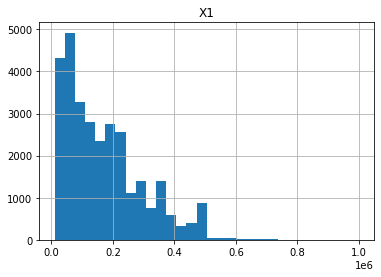

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

objdata = pd.read_excel('datasets/default of credit card clients.xls', skiprows=[1, 2])
objhist = objdata.hist(column = 'X1', bins = 30)
plt.show()

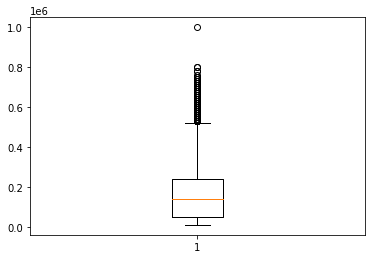

In [13]:
plt.figure()
plt.boxplot(objdata['X1'])
plt.show()

><h2>Empirical Mean and Variance</h2>

> <h4>method1</h4>

In [26]:
import math

avg = 0

for i in range(len(objdata['X1'])):
    avg = avg + objdata['X1'][i]
avg = avg / float(len(objdata['X1']))
print('avg = ', avg)

var = 0

for i in range(len(objdata['X1'])):
    var = var + math.pow(objdata['X1'][i] - avg, 2)
var = var / float(len(objdata['X1']))
print('var = ', var)

std_deviation = math.sqrt(var)
print('std = ', std_deviation)

avg =  167489.2389746325
var =  16833730579.636086
std =  129744.86725738358


> <h4>method2</h4>

In [30]:
avg = 0
avg_squared = 0
var = 0 

for i in range(len(objdata['X1'])):
    avg = avg + objdata['X1'][i]
    avg_squared = avg_squared + math.pow(objdata['X1'][i], 2)   
avg = avg / float(len(objdata['X1']))
avg_squared = avg_squared / float(len(objdata['X1']))

var = avg_squared - math.pow(avg, 2)
std = math.sqrt(var)

print('avg = ', avg)
print('var = ', var)
print('std = ', std)

avg =  167489.2389746325
var =  16833730579.636848
std =  129744.86725738652


* 반복문을 하나만 사용하여 **시간복잡도(o^2)**를 감소

> <h2>Matplotlib</h2>

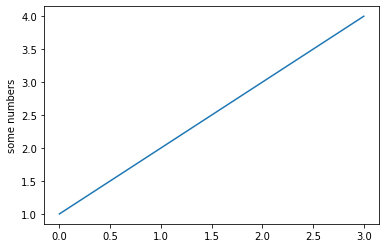

In [31]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

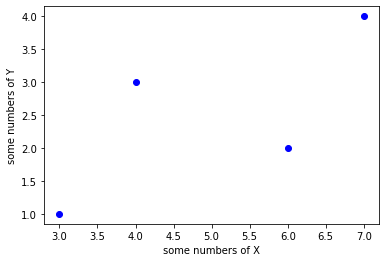

In [32]:
plt.plot([3, 6, 4, 7], [1, 2, 3, 4], 'bo')
plt.xlabel('some numbers of X')
plt.ylabel('some numbers of Y')
plt.show()

> <h4>Scatter Plot</h4>

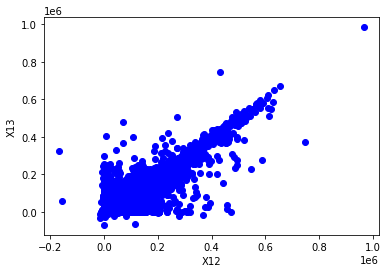

In [33]:
plt.plot(objdata['X12'], objdata['X13'], 'bo')
plt.xlabel('X12')
plt.ylabel('X13')
plt.show()

> <h2>Pivot Table</h2>

In [34]:
import pandas as pd
import numpy as np

objpivotsum = pd.pivot_table(objdata, values = 'X1', index = ['X3', 'X4'], aggfunc = np.sum)
print(objpivotsum)

               X1
X3 X4            
0  1       680000
   2      2360000
1  0       780000
   1    942090000
   2   1302630000
   3      8640000
2  0      1190000
   1   1118376000
   2    929690000
   3     14010000
3  0      5210000
   1    381450000
   2    227867680
   3      7720000
4  1     12570000
   2     13980000
   3       620000
5  1     29026000
   2     17740000
   3       320000
6  1      4470000
   2      2720000
   3       370000


In [35]:
objpivotavg = pd.pivot_table(objdata, values = 'X1', index = ['X3', 'X4'], aggfunc = np.mean)
print(objpivotavg)

                  X1
X3 X4               
0  1   170000.000000
   2   236000.000000
1  0   195000.000000
   1   253113.917249
   2   191310.030842
   3   172800.000000
2  0   198333.333333
   1   163481.362374
   2   132434.472934
   3    86481.481481
3  0   118409.090909
   1   133327.507864
   2   119364.944997
   3    74951.456311
4  1   241730.769231
   2   205588.235294
   3   206666.666667
5  1   193506.666667
   2   139685.039370
   3   106666.666667
6  1   159642.857143
   2   129523.809524
   3   185000.000000


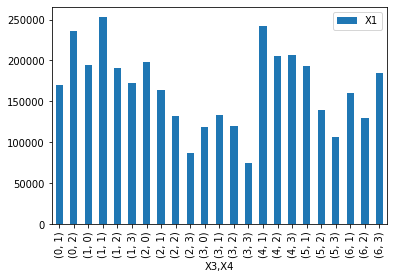

In [36]:
objpivotavg.plot(kind = 'bar')
plt.show()

> <h2>One-hot Encoding</h2>
> 범주형 변수의 숫자는 선후관계나 값에 대한 의미가 없다.
> 이에 대해서 model이 학습할 때, 혼란을 방지하고 학습을 돕기위해 범주형 변수를 전환

In [42]:
objdata_onehot = pd.get_dummies(objdata, columns = ['X2', 'X3', 'X4'])
print(objdata_onehot.iloc[:,22:])

       X2_1  X2_2  X3_0  X3_1  X3_2  X3_3  X3_4  X3_5  X3_6  X4_0  X4_1  X4_2  \
0         0     1     0     0     1     0     0     0     0     0     0     1   
1         0     1     0     0     1     0     0     0     0     0     0     1   
2         0     1     0     0     1     0     0     0     0     0     1     0   
3         1     0     0     0     1     0     0     0     0     0     1     0   
4         1     0     0     1     0     0     0     0     0     0     0     1   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
29994     1     0     0     0     0     1     0     0     0     0     1     0   
29995     1     0     0     0     0     1     0     0     0     0     0     1   
29996     1     0     0     0     1     0     0     0     0     0     0     1   
29997     1     0     0     0     0     1     0     0     0     0     1     0   
29998     1     0     0     0     1     0     0     0     0     0     1     0   

       X4_3  
0         0  